## Gene Expression Cancer RNA Sequence Multi-Model Analysis











### About Dataset:
RNA sequencing (RNAseq) is one of the most commonly used techniques in life sciences and has been widely used in cancer research, drug development, and cancer diagnosis and prognosis. Sequencing the coding regions or the whole cancer transcriptome can provide valuable information about gene expression changes in tumors. Cancer RNA-Seq enables the detection of strand-specific information, an important component of gene regulation. Cancer transcriptome sequencing captures both coding and non-coding RNA and provides strand orientation for a complete view of expression dynamics.

This collection of data is part of the RNA-Seq (HiSeq) PANCAN data set, it is a random extraction of gene expressions of patients having different types of tumor:

*   BRCA - Breast Invasive Carcinoma
*   KIRK - Kidney Renal Clear Cell Carcinoma
*   COAD - Colon Adenocarcinoma
*   LUAD - Lung Adenocarcinoma
*   PRAD - Prostate Adenocarcinoma

Samples (instances) are stored row-wise. Variables (attributes) of each sample are RNA-Seq gene expression levels measured by illumina HiSeq platform.

Initial Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [ ]:
# downloading the dataset and unzipping it
!wget -O data.tar.gz \
https://archive.ics.uci.edu/ml/machine-learning-databases/00401/TCGA-PANCAN-HiSeq-801x20531.tar.gz
!gunzip data.tar.gz
!tar -xvf data.tar

--2024-01-25 09:38:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/00401/TCGA-PANCAN-HiSeq-801x20531.tar.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.tar.gz’

data.tar.gz             [     <=>            ]  69.48M  70.4MB/s    in 1.0s    

2024-01-25 09:38:33 (70.4 MB/s) - ‘data.tar.gz’ saved [72856320]

TCGA-PANCAN-HiSeq-801x20531/
TCGA-PANCAN-HiSeq-801x20531/data.csv
TCGA-PANCAN-HiSeq-801x20531/labels.csv


In [ ]:
# load the the tumor dataset
tumor_data = pd.read_csv('./TCGA-PANCAN-HiSeq-801x20531/data.csv',index_col=0)
# load the corresponding labels
labels=pd.read_csv('./TCGA-PANCAN-HiSeq-801x20531/labels.csv', index_col=0)

#concatenating the labels of ecah sample along with its features
tumor_data['Tumor Label']=labels

In [ ]:
# Print the dataframe
tumor_data.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Tumor Label
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [ ]:
# shape of dataset
data_shape = tumor_data.shape

# Print the result
print("Number of rows and columns in the dataset:", data_shape)

Number of rows and columns in the dataset: (801, 20532)


In [ ]:
# Checking for null values
tumor_data.isnull().sum().any()

False

In [ ]:
# Checking if there are any duplicate rows
print(f'Duplicate rows in the datsaset: {tumor_data.duplicated().sum()}\n')

Duplicate rows in the datsaset: 0



In [ ]:
# statistical view of data
tumor_data.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


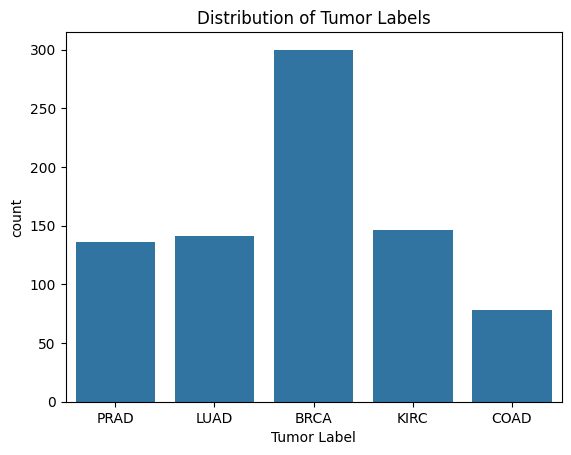

In [ ]:
# Visualize the distribution of the target variable
sns.countplot(x='Tumor Label', data=tumor_data)
plt.title('Distribution of Tumor Labels')
plt.show()


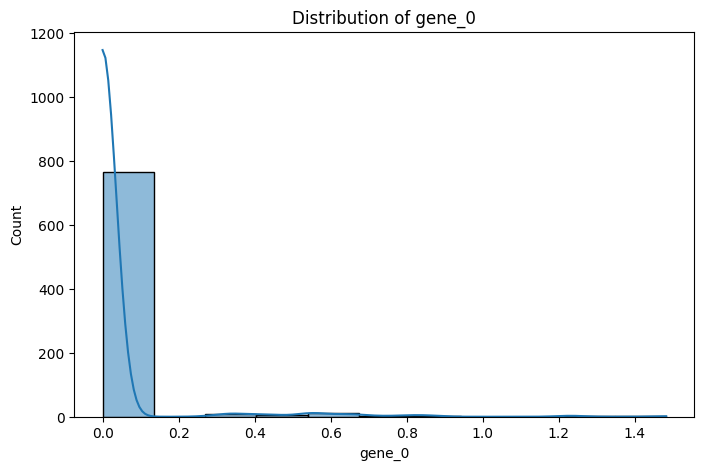


Summary Statistics for gene_0:
count    801.000000
mean       0.026642
std        0.136850
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.482332
Name: gene_0, dtype: float64



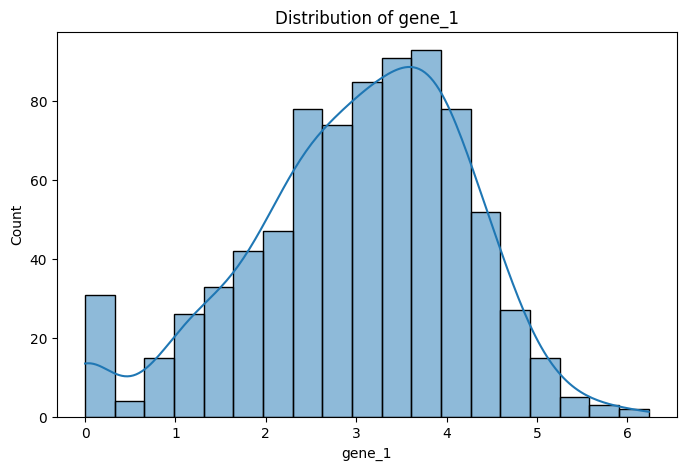


Summary Statistics for gene_1:
count    801.000000
mean       3.010909
std        1.200828
min        0.000000
25%        2.299039
50%        3.143687
75%        3.883484
max        6.237034
Name: gene_1, dtype: float64



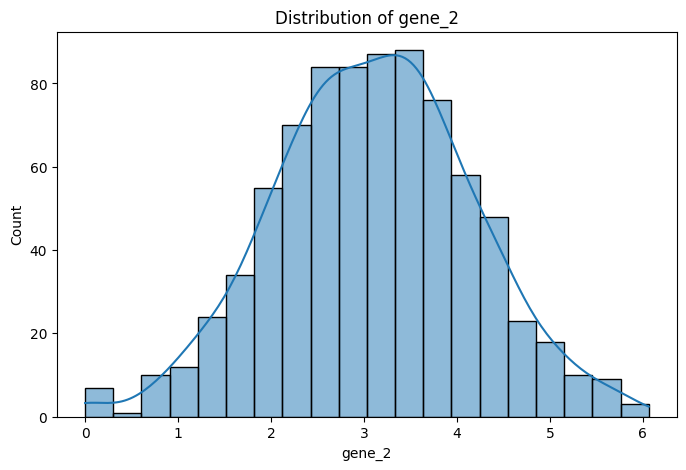


Summary Statistics for gene_2:
count    801.000000
mean       3.095350
std        1.065601
min        0.000000
25%        2.390365
50%        3.127006
75%        3.802534
max        6.063484
Name: gene_2, dtype: float64



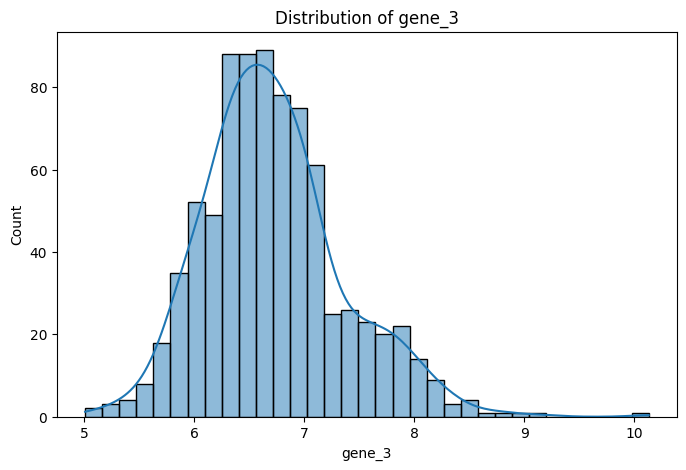


Summary Statistics for gene_3:
count    801.000000
mean       6.722305
std        0.638819
min        5.009284
25%        6.303346
50%        6.655893
75%        7.038447
max       10.129528
Name: gene_3, dtype: float64



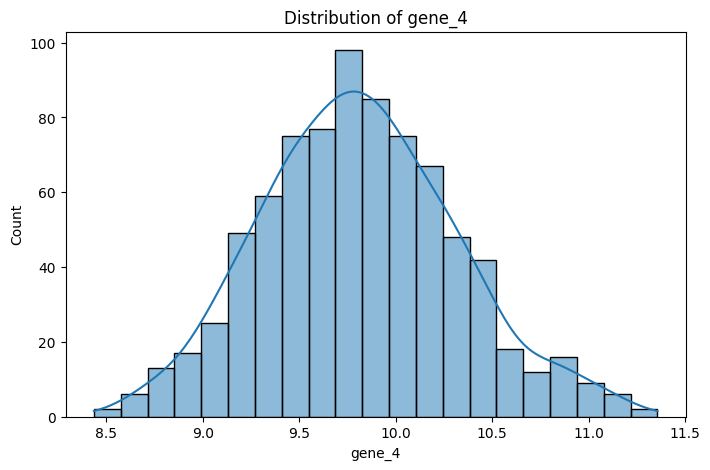


Summary Statistics for gene_4:
count    801.000000
mean       9.813612
std        0.506537
min        8.435999
25%        9.464466
50%        9.791599
75%       10.142324
max       11.355621
Name: gene_4, dtype: float64



In [ ]:
# Explore the distribution of individual gene expressions (e.g., for the first few genes)
genes_to_explore = tumor_data.columns[:5]

for gene in genes_to_explore:
    plt.figure(figsize=(8, 5))
    sns.histplot(tumor_data[gene], kde=True)
    plt.title(f'Distribution of {gene}')
    plt.show()

    # Extract numerical data from the distribution plot
    numerical_data = tumor_data[gene].describe()
    print(f'\nSummary Statistics for {gene}:\n{numerical_data}\n')


Crearting seperate dataframes for different algorithms to work on

In [ ]:
# Logistic Regression
df_logistic_regression = tumor_data.copy()

# SVM
df_svm = tumor_data.copy()

# K Nearest Neighbors
df_knn = tumor_data.copy()

# Hierarchical Clustering
df_hierarchical_clustering = tumor_data.copy()

# Decision Tree
df_decision_tree = tumor_data.copy()

# LightGBM
df_lightgbm = tumor_data.copy()


Implementation Of SVM

In [ ]:
#importing libraries
# Imbalanced class
from imblearn.over_sampling import SMOTE

# Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Mapping each tumor label to integer numbers
svm_map={'PRAD':0,'LUAD':1,'BRCA':2,'KIRC':3,'COAD':4}
# Creating a new column which contains classno
df_svm['Class']= labels['Class'].map(svm_map)

df_svm.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Tumor Label,Class
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD,0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD,1
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD,0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD,0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA,2


In [ ]:
# dropping Label column
df_svm.drop('Tumor Label', axis=1, inplace = True)
df_svm.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,1
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,2


Applying SMOTE to deal with class impalance

SMOTE and then PCA:

In [ ]:
X = df_svm.iloc[:, :-1]
y = df_svm['Class']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Apply SMOTE to the training set only
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# You can check the class distribution after applying SMOTE
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())

Class distribution after SMOTE:
2    239
1    239
4    239
3    239
0    239
Name: Class, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the data before applying PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

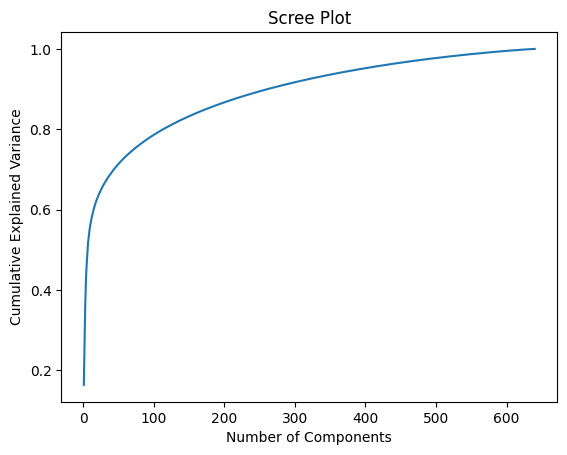

In [ ]:
# Fit PCA to get the explained variance
pca = PCA()
pca.fit(X_train)

# Plotting the explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()


Since the results seem a little unclear, we perform cross validation to check ideal number of components

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score



# Choose a range of components to test
n_components_range = [50, 100, 200, 500,  min(X_train.shape[0], X_train.shape[1])]

# Evaluate Random Forest classifier performance using cross-validation
for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_train)

    # Example: Using Random Forest classifier for evaluation
    clf = RandomForestClassifier(random_state=42)
    scores = cross_val_score(clf, X_pca, y_train, cv=5)

    print(f"Components: {n_components}, Mean Accuracy: {scores.mean()}, Std Dev: {scores.std()}")


Components: 50, Mean Accuracy: 0.9890625, Std Dev: 0.0038273277230987156
Components: 100, Mean Accuracy: 0.9921875, Std Dev: 0.00855816496101822
Components: 200, Mean Accuracy: 0.9859375, Std Dev: 0.007654655446197431
Components: 500, Mean Accuracy: 0.9421875, Std Dev: 0.01530931089239486
Components: 640, Mean Accuracy: 0.9703125, Std Dev: 0.01514899955442603


In [ ]:
# Apply PCA to the resampled data
pca_after_smote = PCA(n_components=100)
X_pca_after_smote = pca_after_smote.fit_transform(X_resampled)

In [ ]:
# Support Vector Machine (SVM) with PCA after SMOTE
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_pca_after_smote, y_resampled)

SVC(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred= svm_classifier.predict(pca_after_smote.transform(X_test))

In [ ]:
# Evaluate the classifier with PCA after SMOTE
print("Results of SVM when applied PCA after Smote:")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Results of SVM when applied PCA after Smote:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        17

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161

Confusion Matrix:
[[29  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 61  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  0 17]]


The model achieved perfect precision, recall, and F1-score for all five classes (0 to 4).

The accuracy is also 1.00 (100%), indicating that all predictions were correct.

The confusion matrix further confirms that there were no misclassifications, with all diagonal elements (main diagonal from top-left to bottom-right) having non-zero values, indicating correct predictions.

In summary, your SVM model performed exceptionally well on the given dataset, achieving perfect classification across all classes.

In [ ]:
from sklearn.model_selection import GridSearchCV
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply SMOTE to the training set only
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Apply PCA to the resampled data
pca_after_smote = PCA(n_components=100)
X_pca_after_smote = pca_after_smote.fit_transform(X_resampled)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

svm_classifier_after_pca = SVC(random_state=42)
grid_search = GridSearchCV(svm_classifier_after_pca, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_pca_after_smote, y_resampled)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the SVM model with the best hyperparameters on the training set
best_svm_classifier_after_pca = grid_search.best_estimator_
best_svm_classifier_after_pca.fit(X_pca_after_smote, y_resampled)

# Make predictions on the test set
y_pred_test_after_pca_svm_tuned = best_svm_classifier_after_pca.predict(pca_after_smote.transform(X_test))

# Evaluate the tuned classifier on the test set
print("\nResults with Tuned SVM (PCA after SMOTE) on Test Set:")
print("Classification Report:")
print(classification_report(y_test, y_pred_test_after_pca_svm_tuned))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test_after_pca_svm_tuned))

Best Hyperparameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}

Results with Tuned SVM (PCA after SMOTE) on Test Set:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        15

    accuracy                           1.00       121
   macro avg       1.00      1.00      1.00       121
weighted avg       1.00      1.00      1.00       121

Confusion Matrix:
[[23  0  0  0  0]
 [ 0 23  0  0  0]
 [ 0  0 45  0  0]
 [ 0  0  0 15  0]
 [ 0  0  0  0 15]]


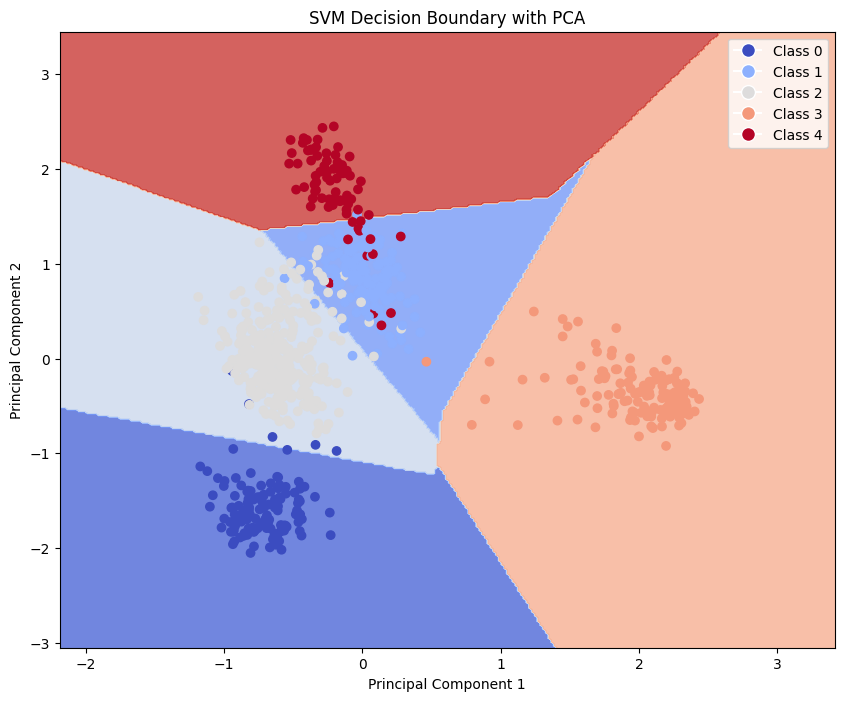

In [ ]:
X = df_svm.iloc[:, :-1]
y = df_svm['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce dimensionality (adjust the number of components as needed)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_pca_standardized = scaler.fit_transform(X_pca)

# Train an SVM model on the reduced-dimension data
svm_classifier = SVC(kernel='linear', C=0.1, gamma='auto', random_state=42)
svm_classifier.fit(X_pca_standardized, y)

# Plot the decision boundary
plt.figure(figsize=(10, 8))

# Plotting the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X_pca_standardized[:, 0].min() - 1, X_pca_standardized[:, 0].max() + 1
y_min, y_max = X_pca_standardized[:, 1].min() - 1, X_pca_standardized[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the data points
scatter = plt.scatter(X_pca_standardized[:, 0], X_pca_standardized[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary with PCA')

# Add a legend
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=f'Class {label}',
                            markerfacecolor=plt.cm.coolwarm(label / (len(np.unique(y)) - 1)), markersize=10)
                 for label in np.unique(y)]
plt.legend(handles=legend_labels)

plt.show()

### Logistic Regression before dimensionality reduction

In [ ]:
# Mapping each tumor label to integer numbers
log_map={'PRAD':0,'LUAD':1,'BRCA':2,'KIRC':3,'COAD':4}
# Creating a new column which contains classno
df_logistic_regression['Class']= labels['Class'].map(log_map)

df_logistic_regression.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Tumor Label,Class
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD,0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD,1
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD,0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD,0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA,2


In [ ]:
# dropping Label column
df_logistic_regression.drop('Tumor Label', axis=1, inplace = True)
df_logistic_regression.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,1
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,2


In [ ]:
X = df_logistic_regression.iloc[:, :-1]
y = df_logistic_regression['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional, depending on your data)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Build Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_standardized, y_train)




LogisticRegression(random_state=42)

In [ ]:
# Make predictions on the training set
y_train_pred = logreg.predict(X_train_standardized)

# Make predictions on the test set
y_test_pred = logreg.predict(X_test_standardized)

In [ ]:
# Evaluate the model on the training set
print("Training Set Performance:")
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

# Evaluate the model on the test set
print("\nTest Set Performance:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Training Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00       210
           3       1.00      1.00      1.00       105
           4       1.00      1.00      1.00        50

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560

Confusion Matrix:
[[ 94   0   0   0   0]
 [  0 101   0   0   0]
 [  0   0 210   0   0]
 [  0   0   0 105   0]
 [  0   0   0   0  50]]

Test Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        90
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        28

  

In [ ]:
from sklearn.manifold import TSNE

X = df_logistic_regression.iloc[:, :-1]
y = df_logistic_regression['Class']

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Perform PCA for initial dimensionality reduction
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X_standardized)

# Perform t-SNE on the PCA-transformed data
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = logreg.predict(X_train)

# Make predictions on the test set
y_test_pred = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Evaluate the model on the training set
print("Training Set Performance:")
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

# Evaluate the model on the test set
print("\nTest Set Performance:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Training Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      0.98      0.99       112
           2       0.99      1.00      1.00       239
           3       1.00      1.00      1.00       121
           4       1.00      1.00      1.00        61

    accuracy                           1.00       640
   macro avg       1.00      1.00      1.00       640
weighted avg       1.00      1.00      1.00       640

Confusion Matrix:
[[107   0   0   0   0]
 [  0 110   2   0   0]
 [  0   0 239   0   0]
 [  0   0   0 121   0]
 [  0   0   0   0  61]]

Test Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        17

  

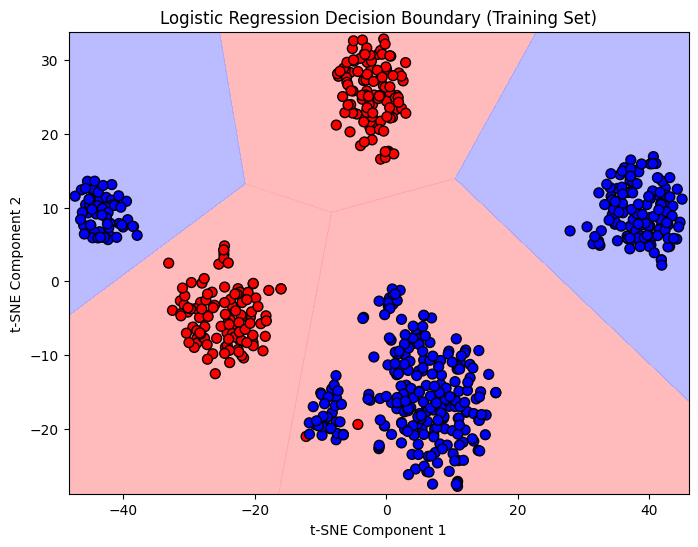

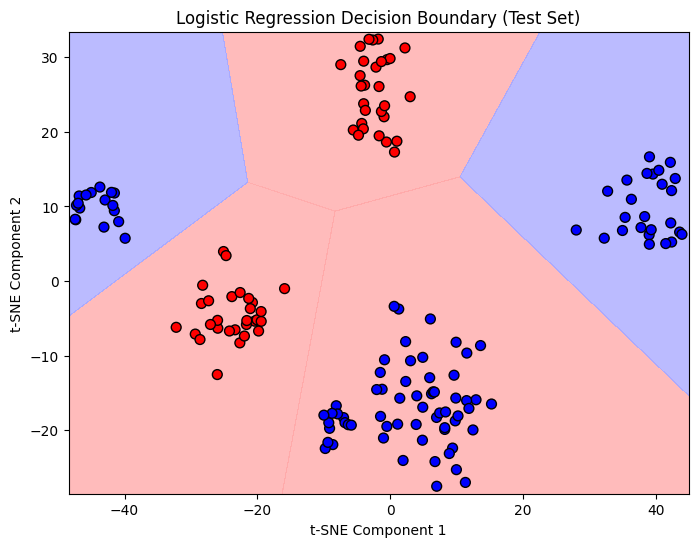

In [ ]:
from matplotlib.colors import ListedColormap
# Plot decision boundary for Logistic Regression on the t-SNE-transformed data
def plot_decision_boundary(X, y, model, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolors='k', marker='o', s=50)
    plt.title(title)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

# Plot decision boundary for training set
plot_decision_boundary(X_train, y_train, logreg, "Logistic Regression Decision Boundary (Training Set)")

# Plot decision boundary for test set
plot_decision_boundary(X_test, y_test, logreg, "Logistic Regression Decision Boundary (Test Set)")


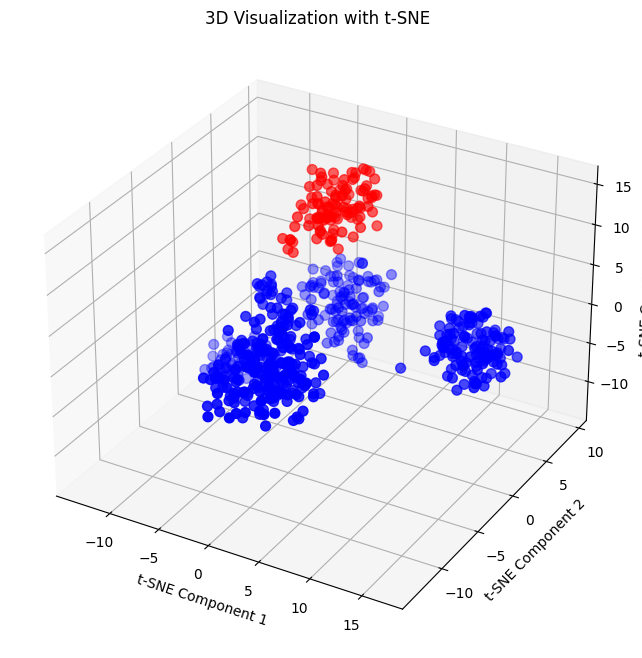

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression

# Assume X and y are your feature matrix and target variable

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Perform t-SNE for dimensionality reduction to 3 components
tsne = TSNE(n_components=3, random_state=42)
X_tsne_3d = tsne.fit_transform(X_standardized)

# Split the data into training and testing sets
X_train_3d, X_test_3d, y_train, y_test = train_test_split(X_tsne_3d, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
logreg_3d = LogisticRegression(random_state=42)
logreg_3d.fit(X_train_3d, y_train)

# Make predictions on the training set
y_train_pred_3d = logreg_3d.predict(X_train_3d)

# Make predictions on the test set
y_test_pred_3d = logreg_3d.predict(X_test_3d)

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red' if label == 0 else 'blue' for label in y_train]
ax.scatter(X_train_3d[:, 0], X_train_3d[:, 1], X_train_3d[:, 2], c=colors, marker='o', s=50)

ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('3D Visualization with t-SNE')

plt.show()


Training Set Performance:
Accuracy: 100%
Precision, Recall, and F1-Score: All metrics are perfect (1.00) for each class.
Confusion Matrix: All diagonal elements are non-zero, indicating correct predictions for each class.

Test Set Performance:
Accuracy: 100%
Precision, Recall, and F1-Score: All metrics are perfect (1.00) for each class.
Confusion Matrix: All diagonal elements are non-zero, indicating correct predictions for each class.

Insights:
Model Generalization: The model has achieved perfect performance not only on the training set but also on the unseen test set. This suggests that the model is generalizing well to new, previously unseen data.

No Overfitting: The absence of discrepancies between training and test set performance, along with perfect metrics, suggests that the model is not overfitting to the training data.

Class Separation: The model is successfully distinguishing between different tumor types, and the features derived from PCA and t-SNE appear to capture meaningful patterns in the data.

Potential Redundancy: Achieving perfect performance may indicate that the data contains a high level of separability between classes, possibly due to the nature of the gene expression features.

## K- Nearest Neighbour

In [ ]:
#impoerting lib
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import warnings
from scipy import cluster
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics,datasets
warnings.filterwarnings('ignore')

In [ ]:
# mapping and dropping
kn_map={'PRAD':0,'LUAD':1,'BRCA':2,'KIRC':3,'COAD':4}
df_knn['classno']= labels['Class'].map(kn_map)


df_knn.drop(['Tumor Label'], axis=1, inplace=True)
df_knn.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,classno
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,1
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,2


In [ ]:
#calculating z score data
from scipy.stats import zscore
z_scores = df_knn.apply(zscore, axis=0)
print(z_scores)

              gene_0    gene_1    gene_2    gene_3    gene_4  gene_5  \
sample_0   -0.194799 -0.828030  0.159800 -1.948277  1.221575     NaN   
sample_1   -0.194799 -2.015017 -1.415042  1.353109 -0.376518     NaN   
sample_2   -0.194799  0.417348  1.156735  0.249807  0.112832     NaN   
sample_3   -0.194799  0.543888  1.326182 -0.099053  0.755741     NaN   
sample_4   -0.194799 -0.295955 -0.257107 -0.286413 -0.148843     NaN   
...              ...       ...       ...       ...       ...     ...   
sample_796 -0.194799 -0.954328 -0.354155  0.983356  0.380054     NaN   
sample_797 -0.194799  0.776655  1.275624 -0.588497  0.480533     NaN   
sample_798 -0.194799  0.198881  0.574816  2.292529 -0.611452     NaN   
sample_799 -0.194799 -0.350453 -0.288632  0.934054  0.342783     NaN   
sample_800 -0.194799 -0.571352  0.667254 -0.300836 -0.500265     NaN   

              gene_6    gene_7    gene_8    gene_9  ...  gene_20522  \
sample_0   -0.207968  0.180910 -0.125376 -0.065633  ...   -0.921

In [ ]:
#standardizing data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standardized = scaler.fit_transform(df_knn)

In [ ]:
df_knn.head

<bound method NDFrame.head of             gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
sample_0       0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
sample_1       0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
sample_2       0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
sample_3       0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
sample_4       0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   
...            ...       ...       ...       ...        ...     ...       ...   
sample_796     0.0  1.865642  2.718197  7.350099  10.006003     0.0  6.764792   
sample_797     0.0  3.942955  4.453807  6.346597  10.056868     0.0  7.320331   
sample_798     0.0  3.249582  3.707492  8.185901   9.504082     0.0  7.536589   
sample_799     0.0  2.590339  2.787976  7.318624   9.987136     0.0  9.213464   
sample_800     0.0  2.325242  3.805932  6.530246   9.560367     0.0  7.957027  

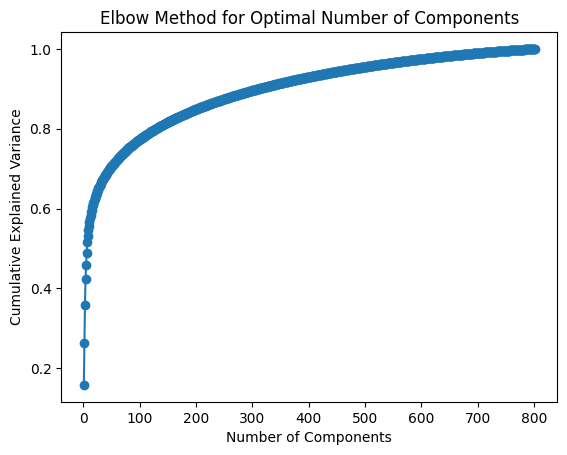

In [ ]:
#calculating cumulative explained variance to calculate optimal number of pca components
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_knn)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method for Optimal Number of Components')
plt.show()

In [ ]:
#doing pca
pca = PCA(n_components=80)
pca_result = pca.fit_transform(df_knn)
columns = [f"PC{i+1}" for i in range(80)]
pca_df = pd.DataFrame(data=pca_result, columns=columns)

In [ ]:
pca_df.head

<bound method NDFrame.head of            PC1        PC2        PC3        PC4        PC5         PC6  \
0   -62.786163 -94.100297  89.491723 -15.907360  81.425062  -14.004262   
1    -2.429739  90.556472  -1.029830 -53.131170 -15.680145   60.850935   
2   -71.279369  -8.074642  66.106410  81.358498  -7.533010  109.850006   
3   -84.795863 -73.258708  74.156304  27.038692 -18.047354   50.115973   
4   -69.554037  -9.565994 -67.507597  34.875155  -1.795786   -6.674761   
..         ...        ...        ...        ...        ...         ...   
796 -60.857155 -22.227565 -80.941380  42.677351   7.843538   -4.538842   
797 -14.469149  53.355810  38.178705 -63.240567  22.797568   39.542646   
798  10.502364  21.570103  41.350130 -59.599132  -2.155856  -96.491522   
799 -55.093915 -92.421608  80.022642  -7.753376  15.181095    2.556449   
800 -49.127222 -51.022168  40.492357 -31.485881 -10.361484   -1.275322   

           PC7        PC8        PC9       PC10  ...       PC71       PC72  \
0  

In [ ]:
# KNN lib
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pca_df, labels, test_size=0.2, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[61  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 29  0]
 [ 0  0  0  0 29]]


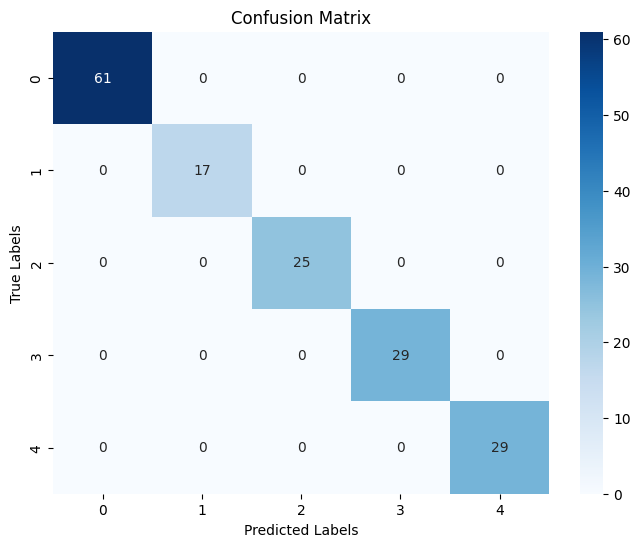

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

label2_map = {0: 'PRAD', 1: 'LUAD', 2: 'BRCA', 3: 'KIRC', 4: 'COAD'}
# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label2_map.keys(), yticklabels=label2_map.keys())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#calculating TP, TN, FP, Fn
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print(f'True Positives: {TP}')
print(f'True Negatives: {TN}')
print(f'False Positives: {FP}')
print(f'False Negatives: {FN}')

True Positives: 17
True Negatives: 61
False Positives: 0
False Negatives: 0


In [ ]:
# Calculate precision, recall, and F1-score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Precision: 1.00
Recall: 1.00
F1-Score: 1.00


Insights:

True Positives (TP): 17

True Negatives (TN): 61

False Positives (FP): 0

False Negatives (FN): 0

Accuracy: 1.00 (100%)

The model achieved perfect accuracy, indicating that all predictions were correct.

Precision: 1.00 (100%)

A precision of 1.00 means that every positive prediction made by the model was correct.

Recall (Sensitivity or True Positive Rate): 1.00 (100%)

A recall of 1.00 means that the model identified all positive instances.

F1-Score: 1.00 (100%)

A score of 1.00 indicates a perfect balance.

These metrics collectively suggest that the k-nearest neighbors model with PCA (80 components) performed exceptionally well on the given dataset, achieving perfect accuracy and making precise and recall-efficient predictions. The model seems to be well-suited for the classification task at hand.


## Hierarchical Clustering

In [ ]:
#importing lib
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


Using the same PCA implemeted df that we used for K nearest neighbours.

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score

In [ ]:
# defining linkage methds
linkage_methods = ['single', 'complete', 'average', 'ward']

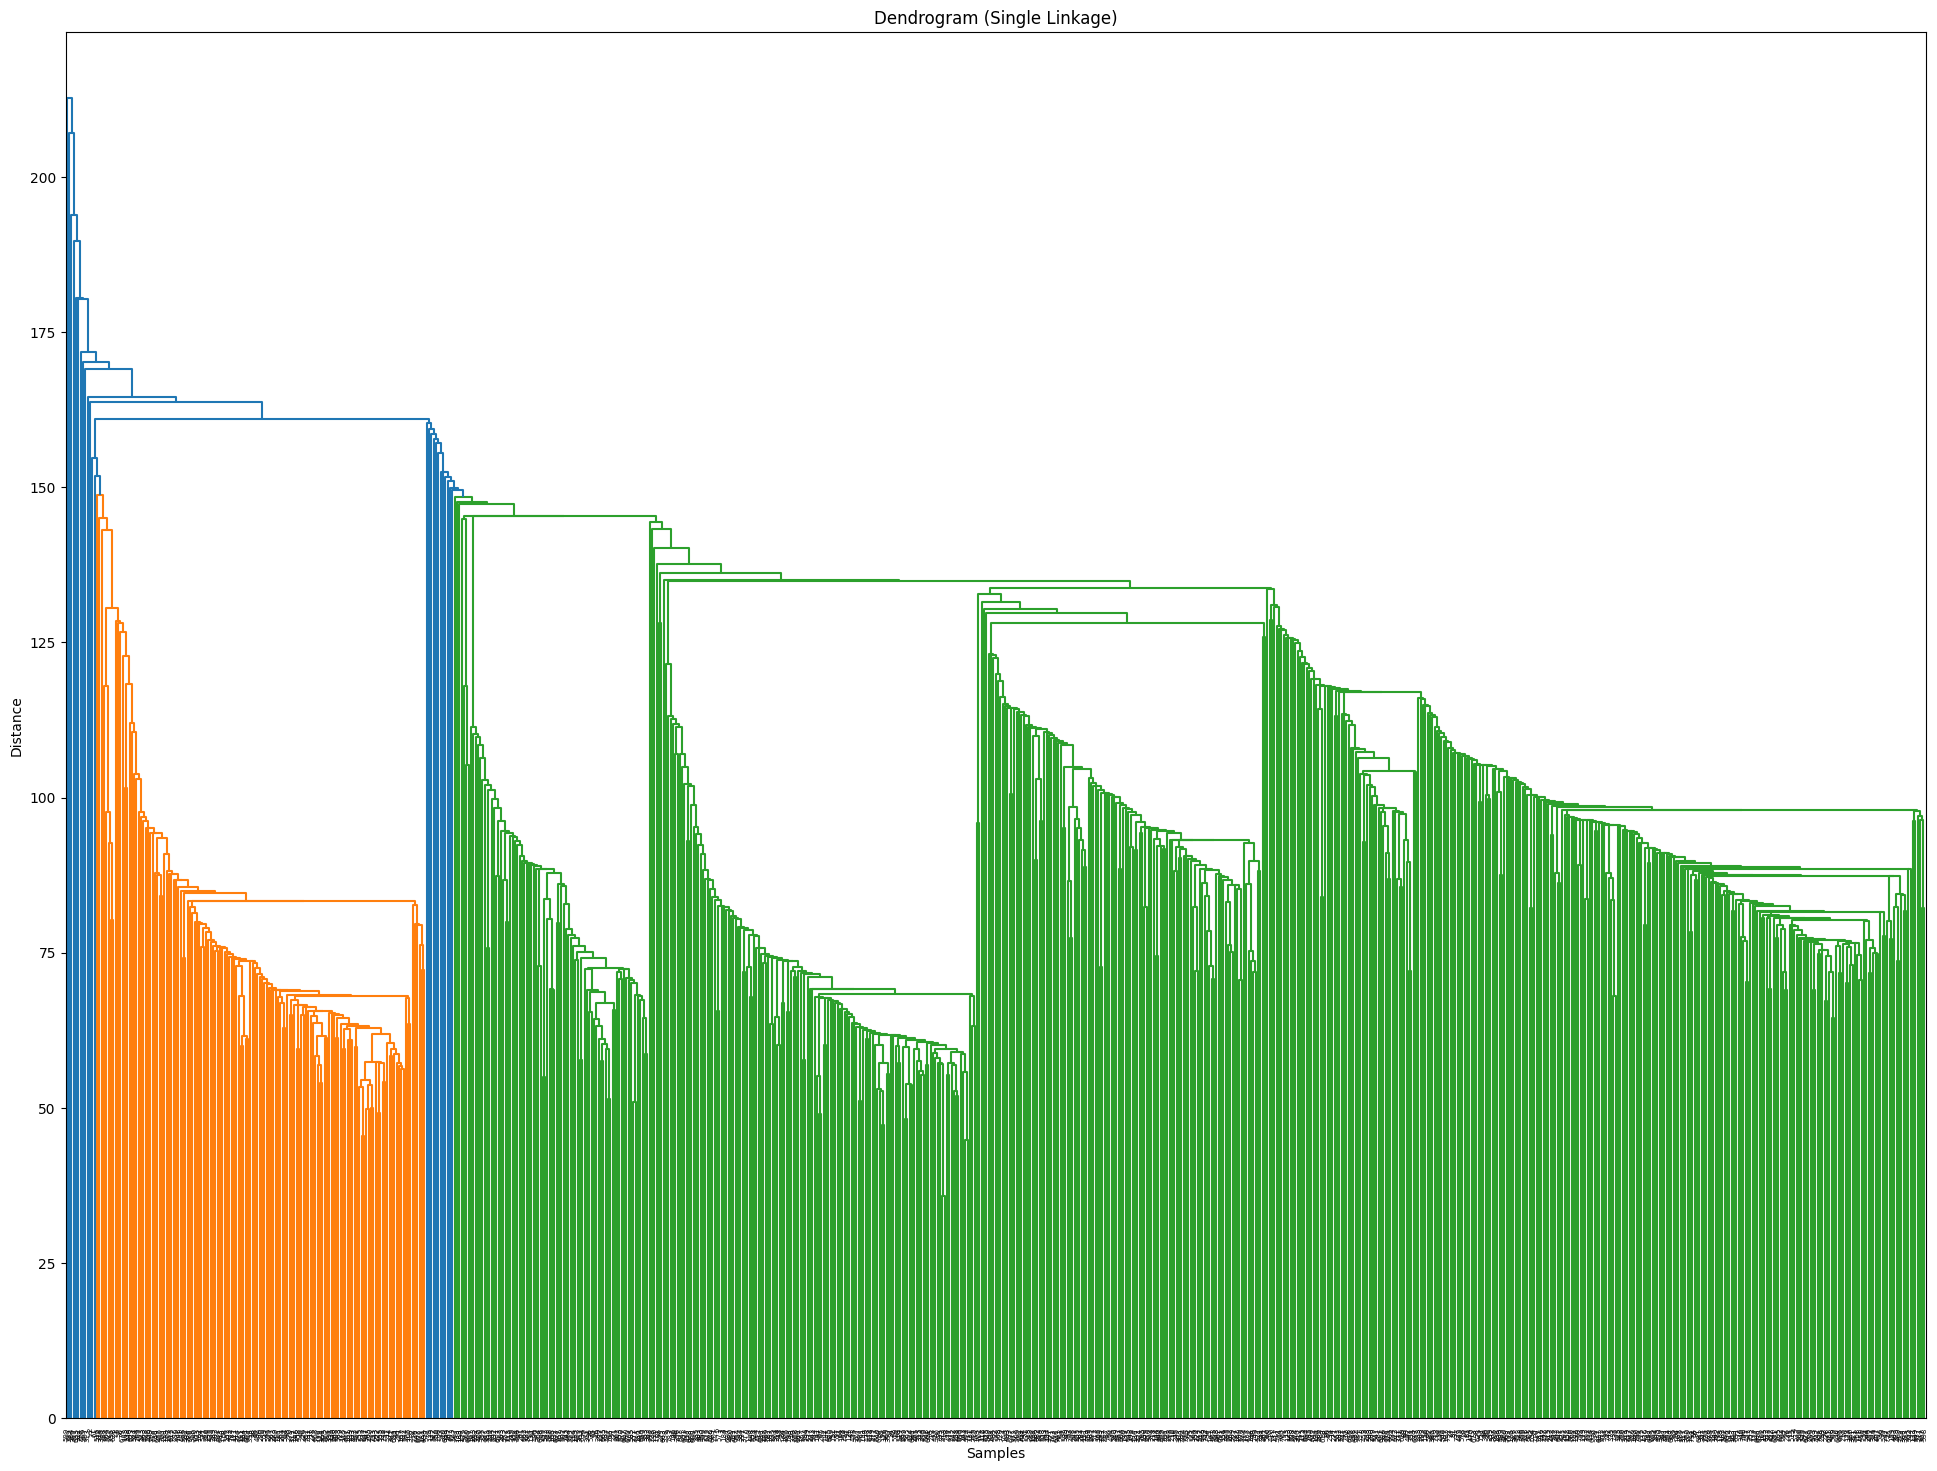

Silhouette Score (Single Linkage): 0.17717243593159082


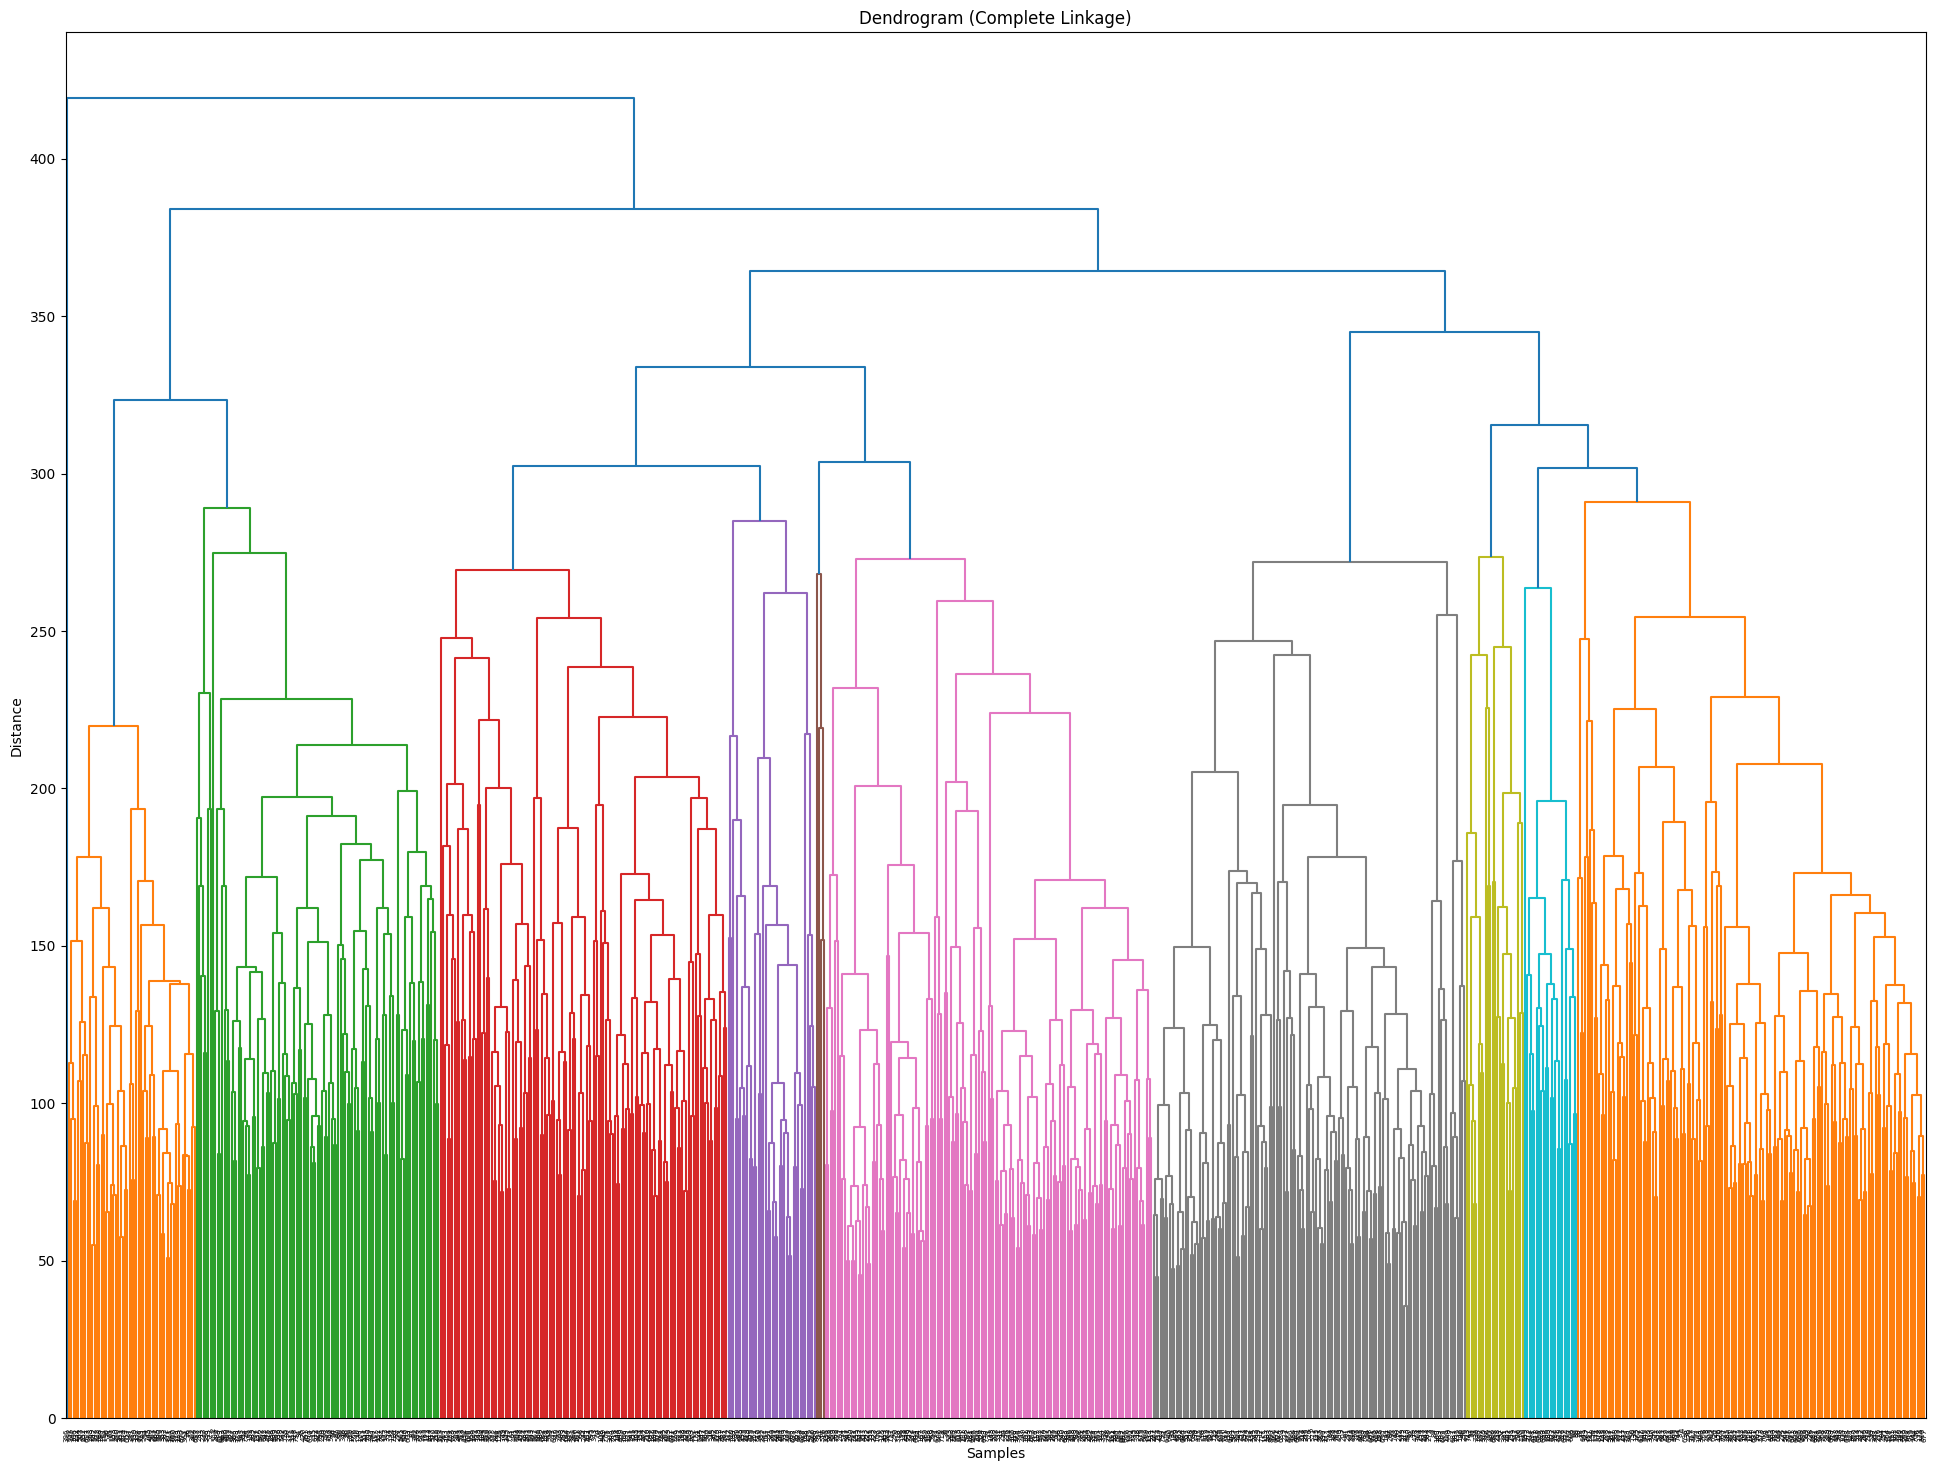

Silhouette Score (Complete Linkage): 0.24801722845347837


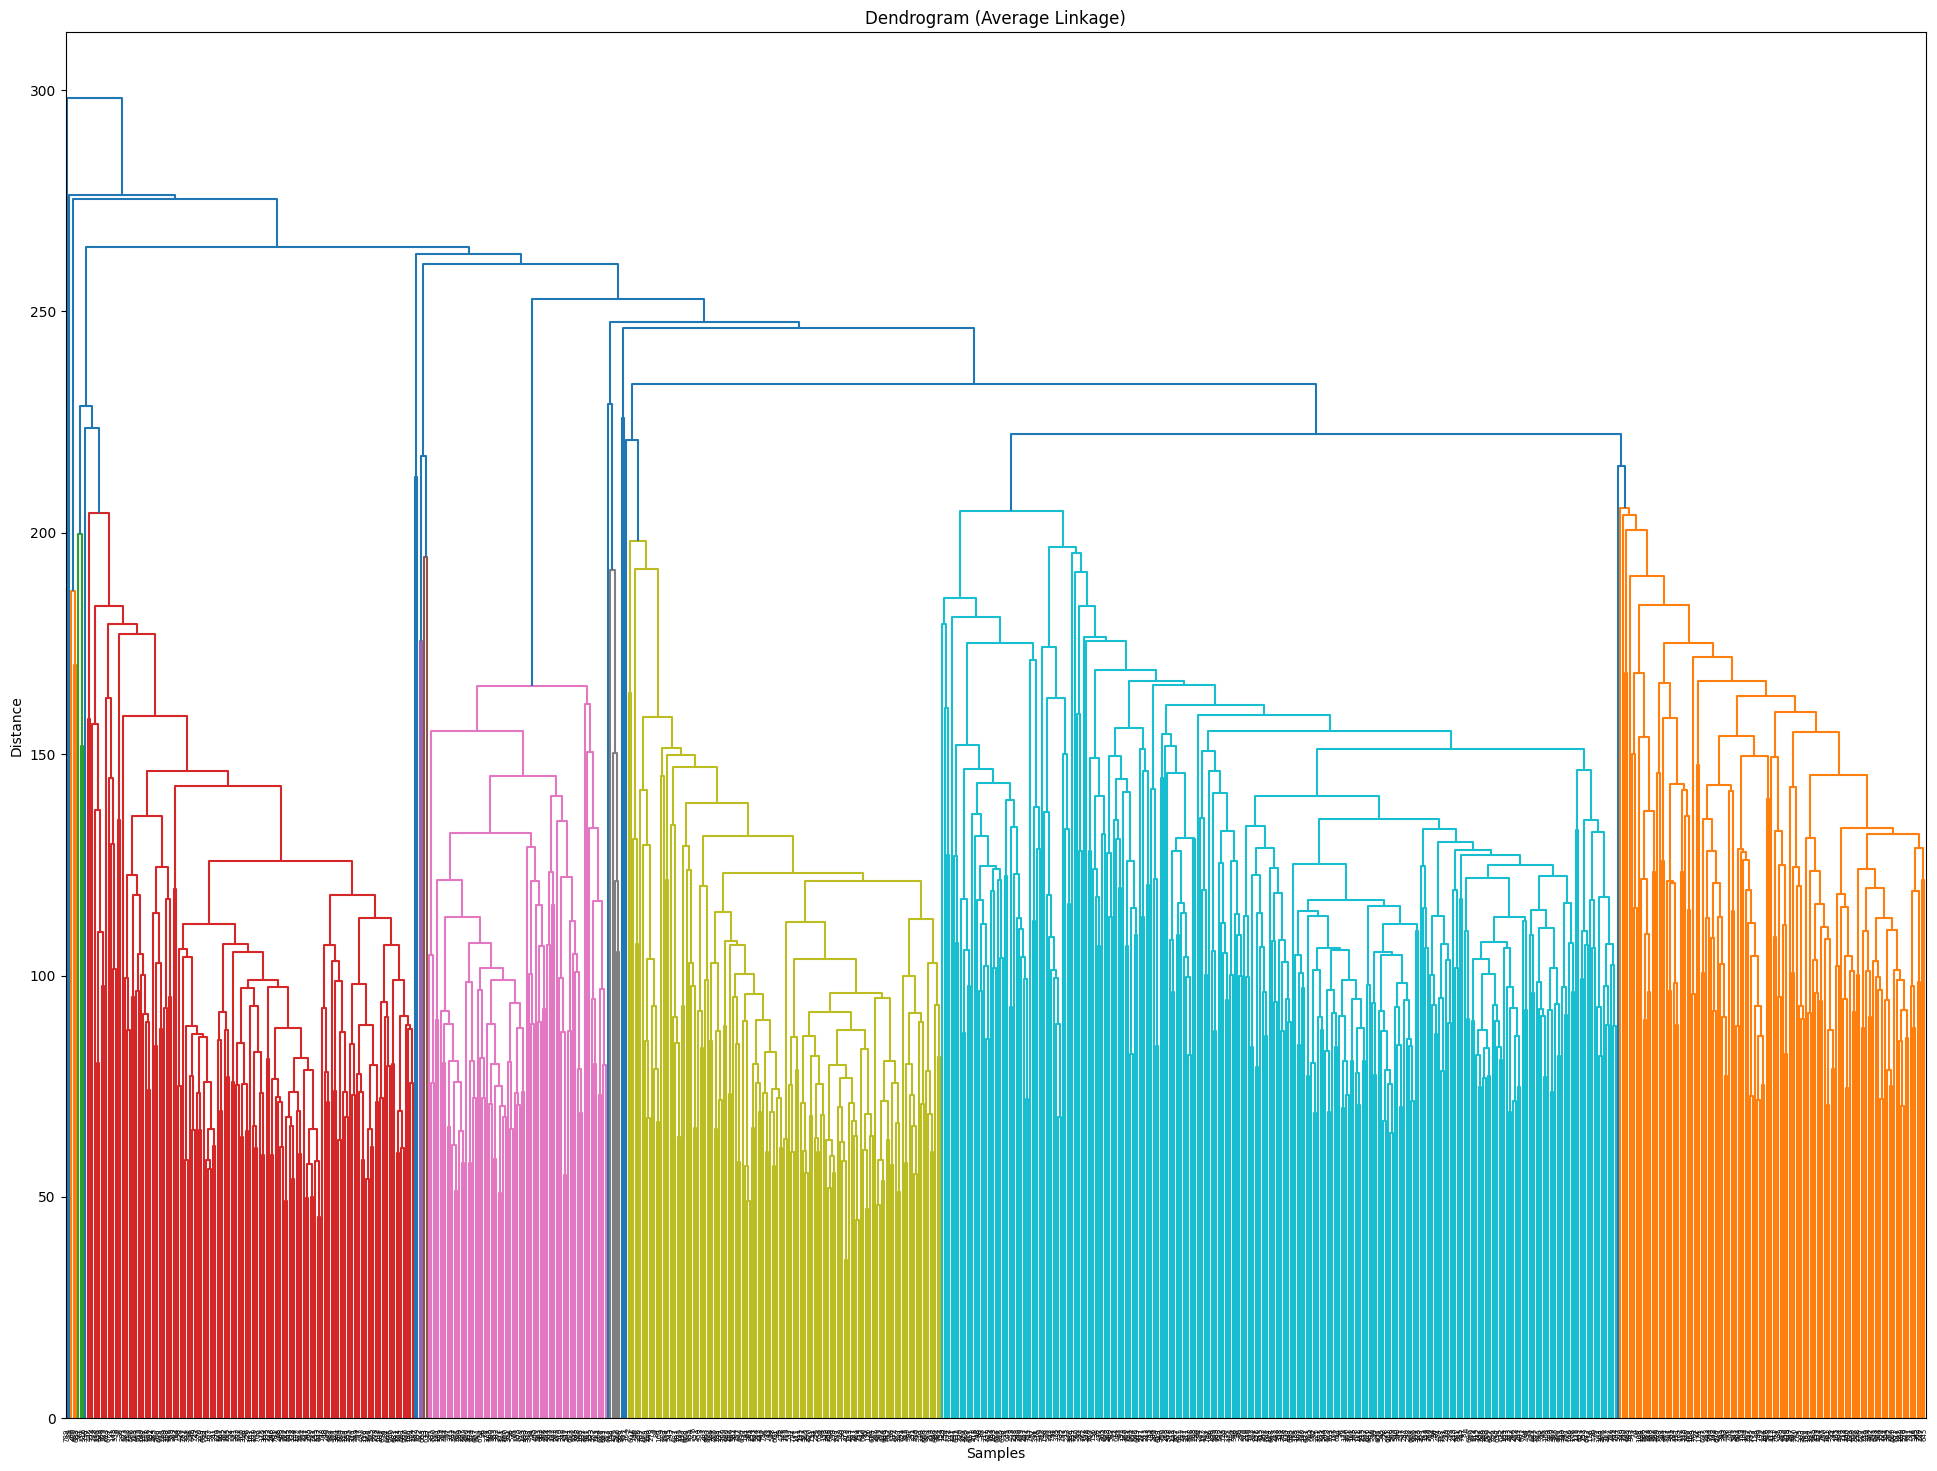

Silhouette Score (Average Linkage): 0.23420372255599262


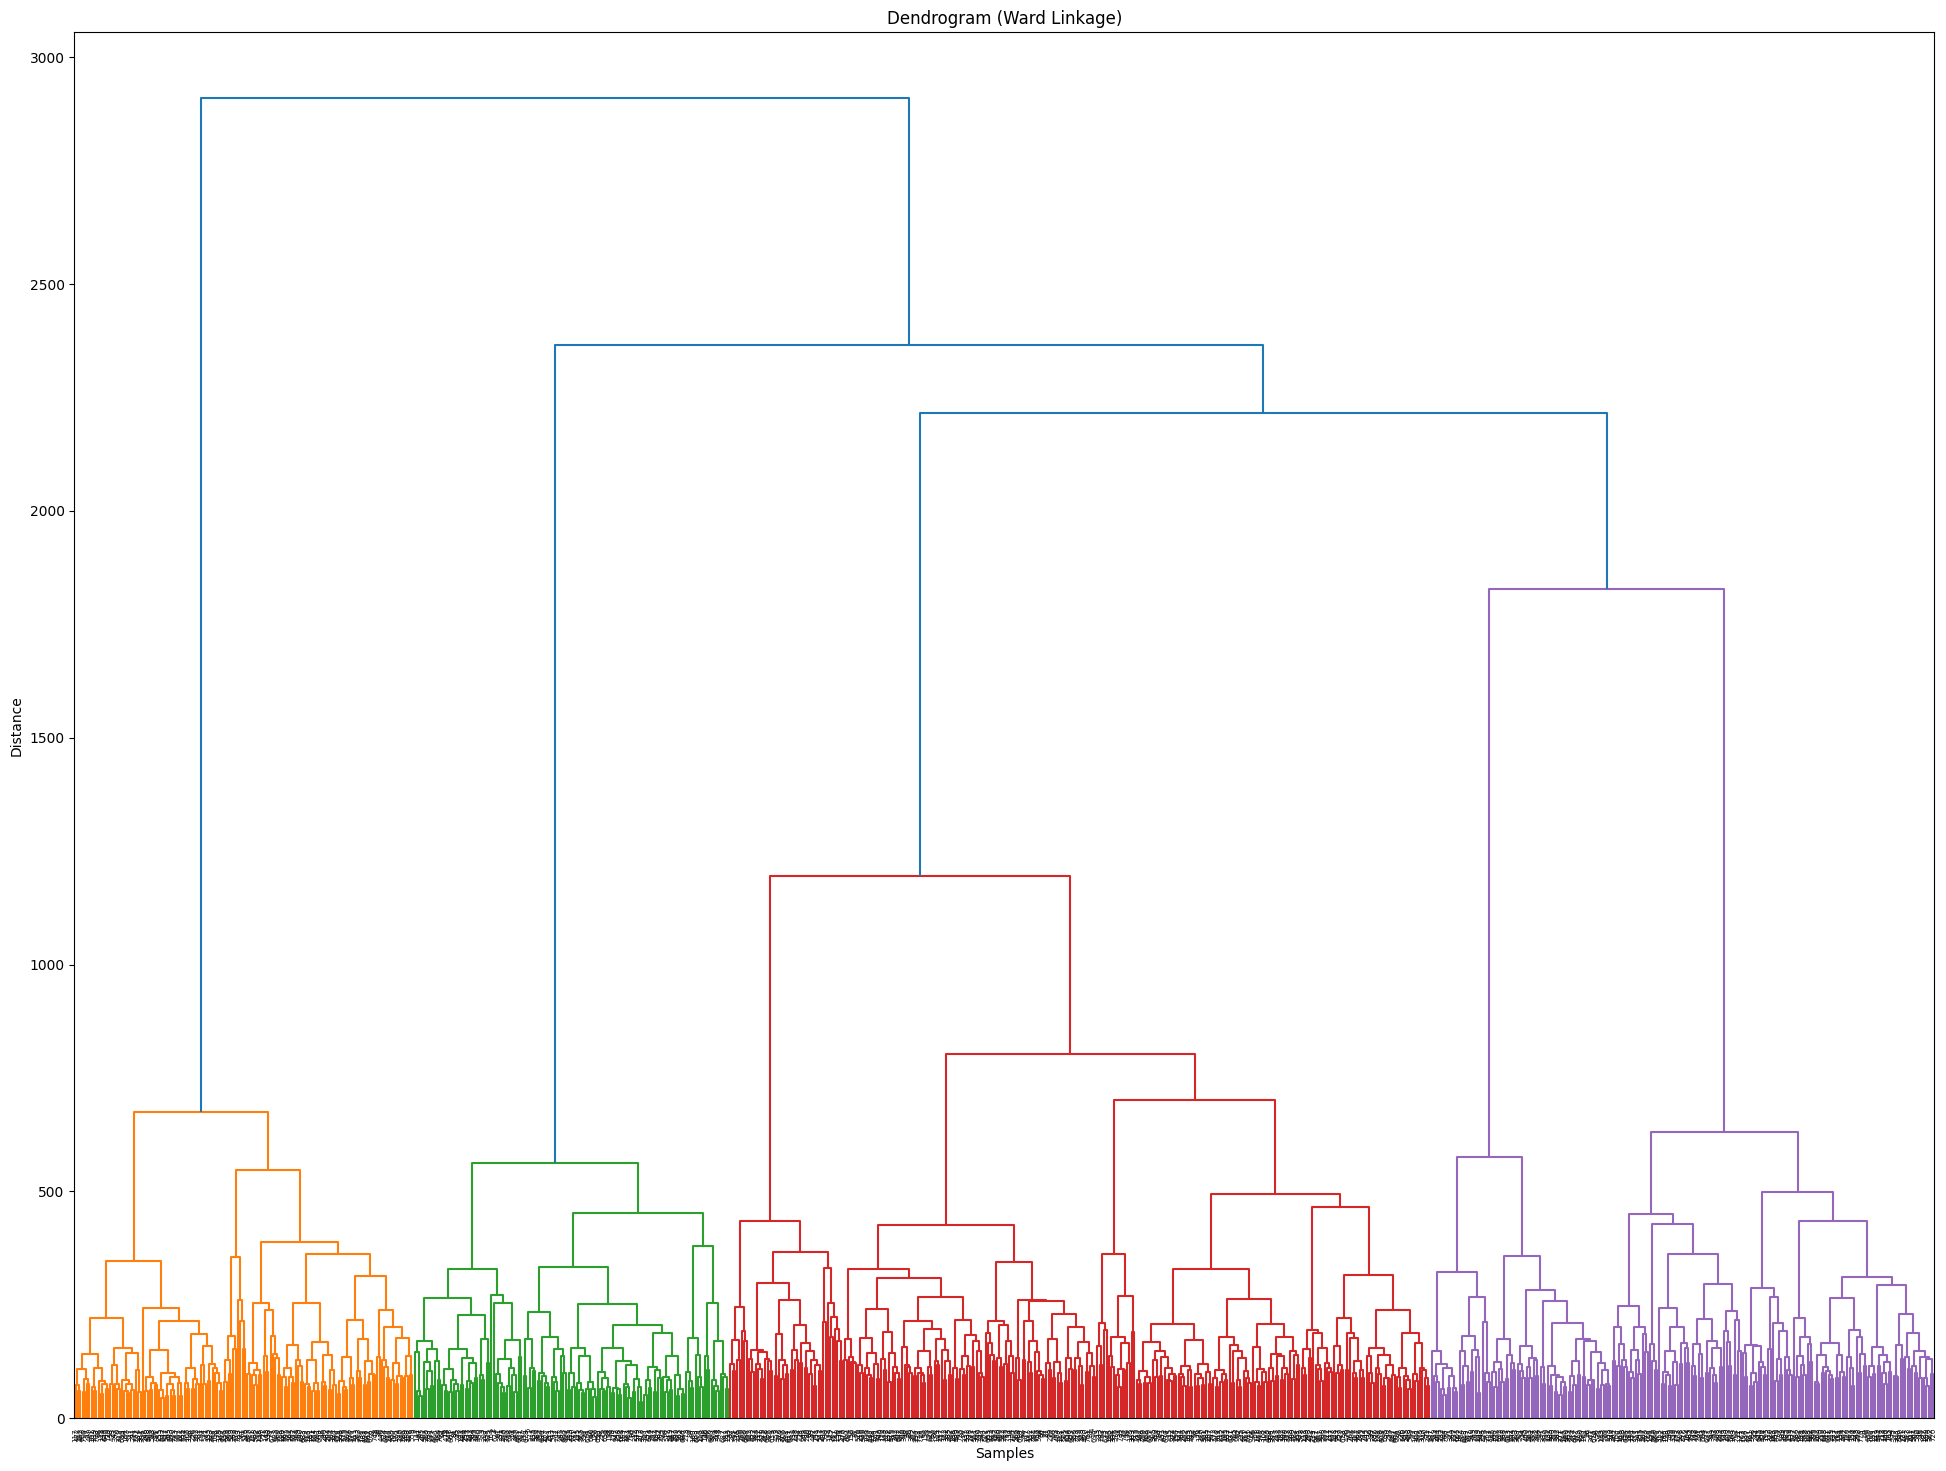

Silhouette Score (Ward Linkage): 0.32163884835927115


In [ ]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster, ward, average, complete, single

# Function to calculate silhouette score for a given linkage method
def evaluate_linkage_method(Z, linkage_method, data):
    # Determine the optimal number of clusters using the maximum silhouette score
    max_silhouette = -1
    optimal_num_clusters = 2  # Minimum number of clusters
    for num_clusters in range(2, 10):
        labels = fcluster(Z, t=num_clusters, criterion='maxclust')
        silhouette = silhouette_score(data, labels)
        if silhouette > max_silhouette:
            max_silhouette = silhouette
            optimal_num_clusters = num_clusters

    # Plot the dendrogram
    plt.figure(figsize=(24, 18))
    dendrogram(Z)
    plt.title(f'Dendrogram ({linkage_method.capitalize()} Linkage)')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

    # Assign cluster labels using the optimal number of clusters
    labels_optimal = fcluster(Z, t=optimal_num_clusters, criterion='maxclust')

    # Calculate silhouette score for the optimal clustering
    silhouette_optimal = silhouette_score(data, labels_optimal)
    print(f'Silhouette Score ({linkage_method.capitalize()} Linkage): {silhouette_optimal}')

Z_single = linkage(pca_df, method='single', metric='euclidean')
Z_complete = linkage(pca_df, method='complete', metric='euclidean')
Z_average = linkage(pca_df, method='average', metric='euclidean')
Z_ward = linkage(pca_df, method='ward', metric='euclidean')

# Evaluate each linkage method
evaluate_linkage_method(Z_single, 'single', pca_df)
evaluate_linkage_method(Z_complete, 'complete', pca_df)
evaluate_linkage_method(Z_average, 'average', pca_df)
evaluate_linkage_method(Z_ward, 'ward', pca_df)


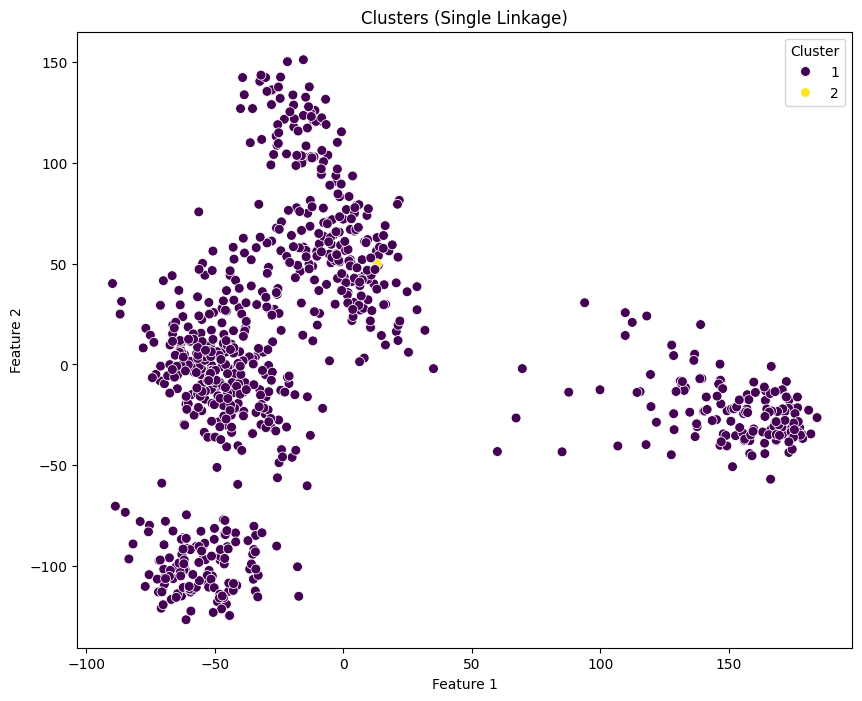

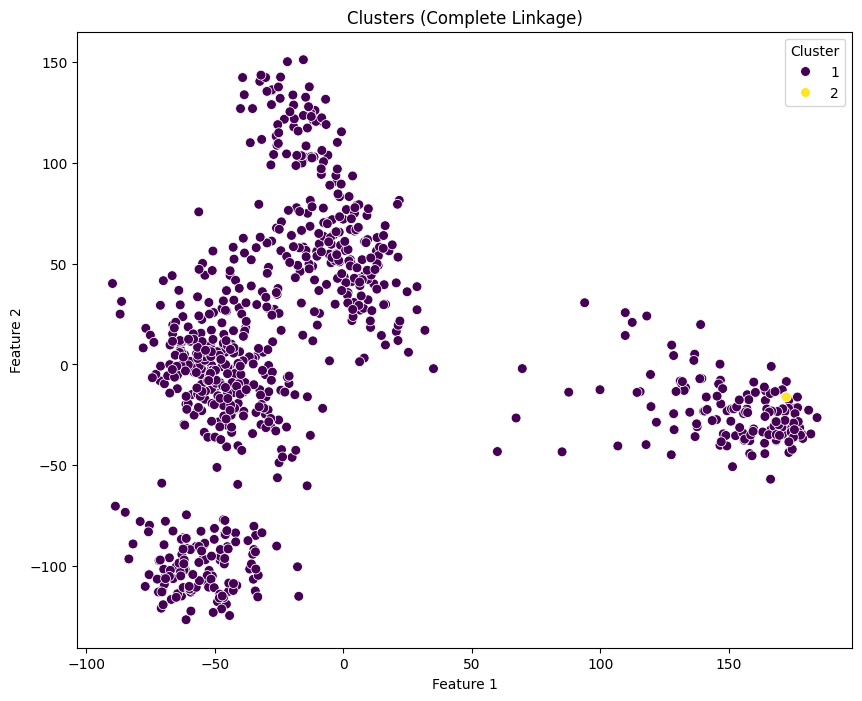

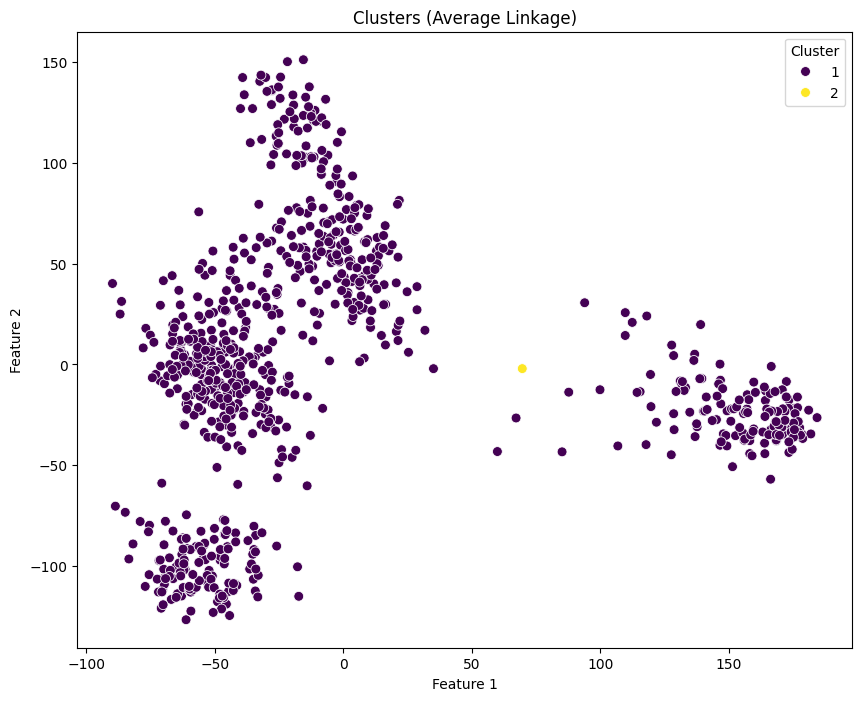

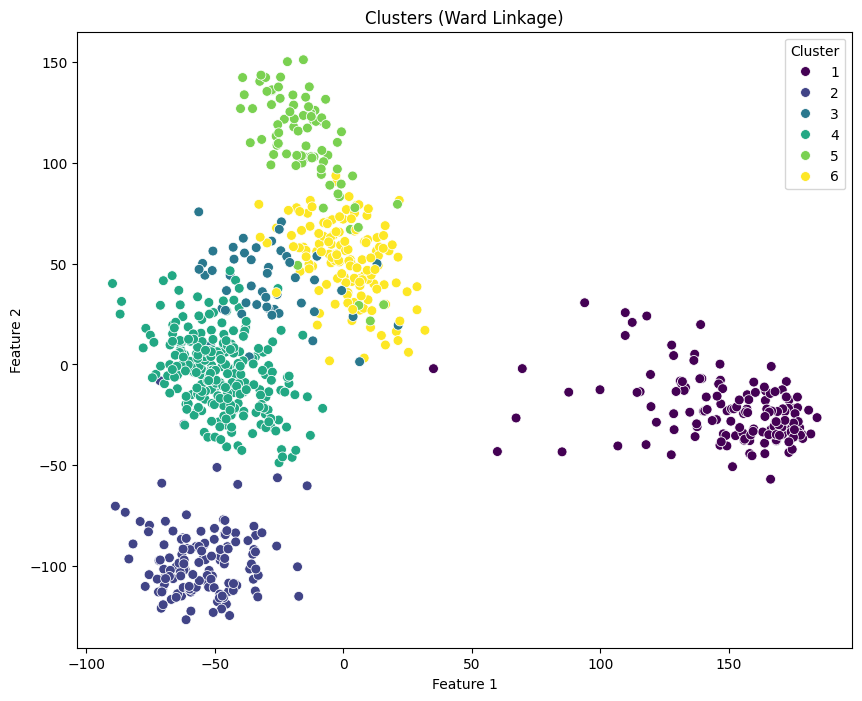

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Function to visualize clusters
def visualize_clusters(Z, linkage_method, data):
    # Determine the optimal number of clusters using the maximum silhouette score
    max_silhouette = -1
    optimal_num_clusters = 2  # Minimum number of clusters
    for num_clusters in range(2, 10):
        labels = fcluster(Z, t=num_clusters, criterion='maxclust')
        silhouette = silhouette_score(data, labels)
        if silhouette > max_silhouette:
            max_silhouette = silhouette
            optimal_num_clusters = num_clusters

    # Assign cluster labels using the optimal number of clusters
    labels_optimal = fcluster(Z, t=optimal_num_clusters, criterion='maxclust')

    # Create a scatter plot to visualize clusters
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=labels_optimal, palette='viridis', s=50)
    plt.title(f'Clusters ({linkage_method.capitalize()} Linkage)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(title='Cluster')
    plt.show()

# Visualize clusters for each linkage method
visualize_clusters(Z_single, 'single', pca_df)
visualize_clusters(Z_complete, 'complete', pca_df)
visualize_clusters(Z_average, 'average', pca_df)
visualize_clusters(Z_ward, 'ward', pca_df)

Insights:

Single Linkage: 0.178

- The silhouette score is relatively low, indicating that clusters may overlap, and the assignment of data points to clusters may not be well-defined. Single linkage tends to form long, chain-like clusters.

Complete Linkage: 0.248

- The silhouette score is higher than that of single linkage, suggesting better-defined clusters. Complete linkage tends to create compact, spherical clusters.

Average Linkage: 0.235

- The silhouette score is moderate, indicating moderate cohesion within clusters and separation between clusters. Average linkage is a compromise between single and complete linkage.

Ward Linkage: 0.322

- The silhouette score is the highest among the methods, suggesting well-defined, compact clusters. Ward linkage tends to minimize variance within clusters.

Inference:

- Ward linkage seems to perform the best among the tested linkage methods, providing the highest silhouette score. It tends to create more compact and well-separated clusters.
- Complete linkage also shows good performance, while single linkage performs the least well, possibly due to its tendency to form elongated clusters.

## Decision Tree

In [ ]:
# Separate features (X) and target variable (y)
X = df_decision_tree.drop('Tumor Label', axis=1)
y = df_decision_tree['Tumor Label']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Evaluate the model on the testing set
y_pred = dt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9751552795031055

Classification Report:
               precision    recall  f1-score   support

        BRCA       0.95      0.98      0.97        61
        COAD       1.00      1.00      1.00        17
        KIRC       1.00      1.00      1.00        25
        LUAD       0.97      0.97      0.97        29
        PRAD       1.00      0.93      0.96        29

    accuracy                           0.98       161
   macro avg       0.98      0.98      0.98       161
weighted avg       0.98      0.98      0.98       161


Confusion Matrix:
 [[60  0  0  1  0]
 [ 0 17  0  0  0]
 [ 0  0 25  0  0]
 [ 1  0  0 28  0]
 [ 2  0  0  0 27]]


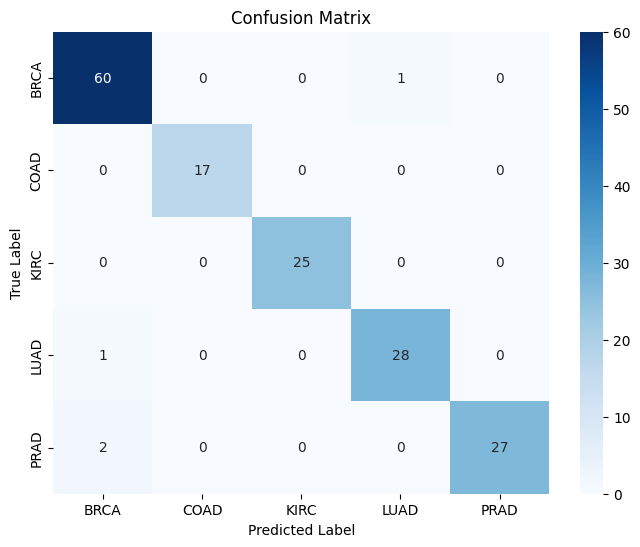

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

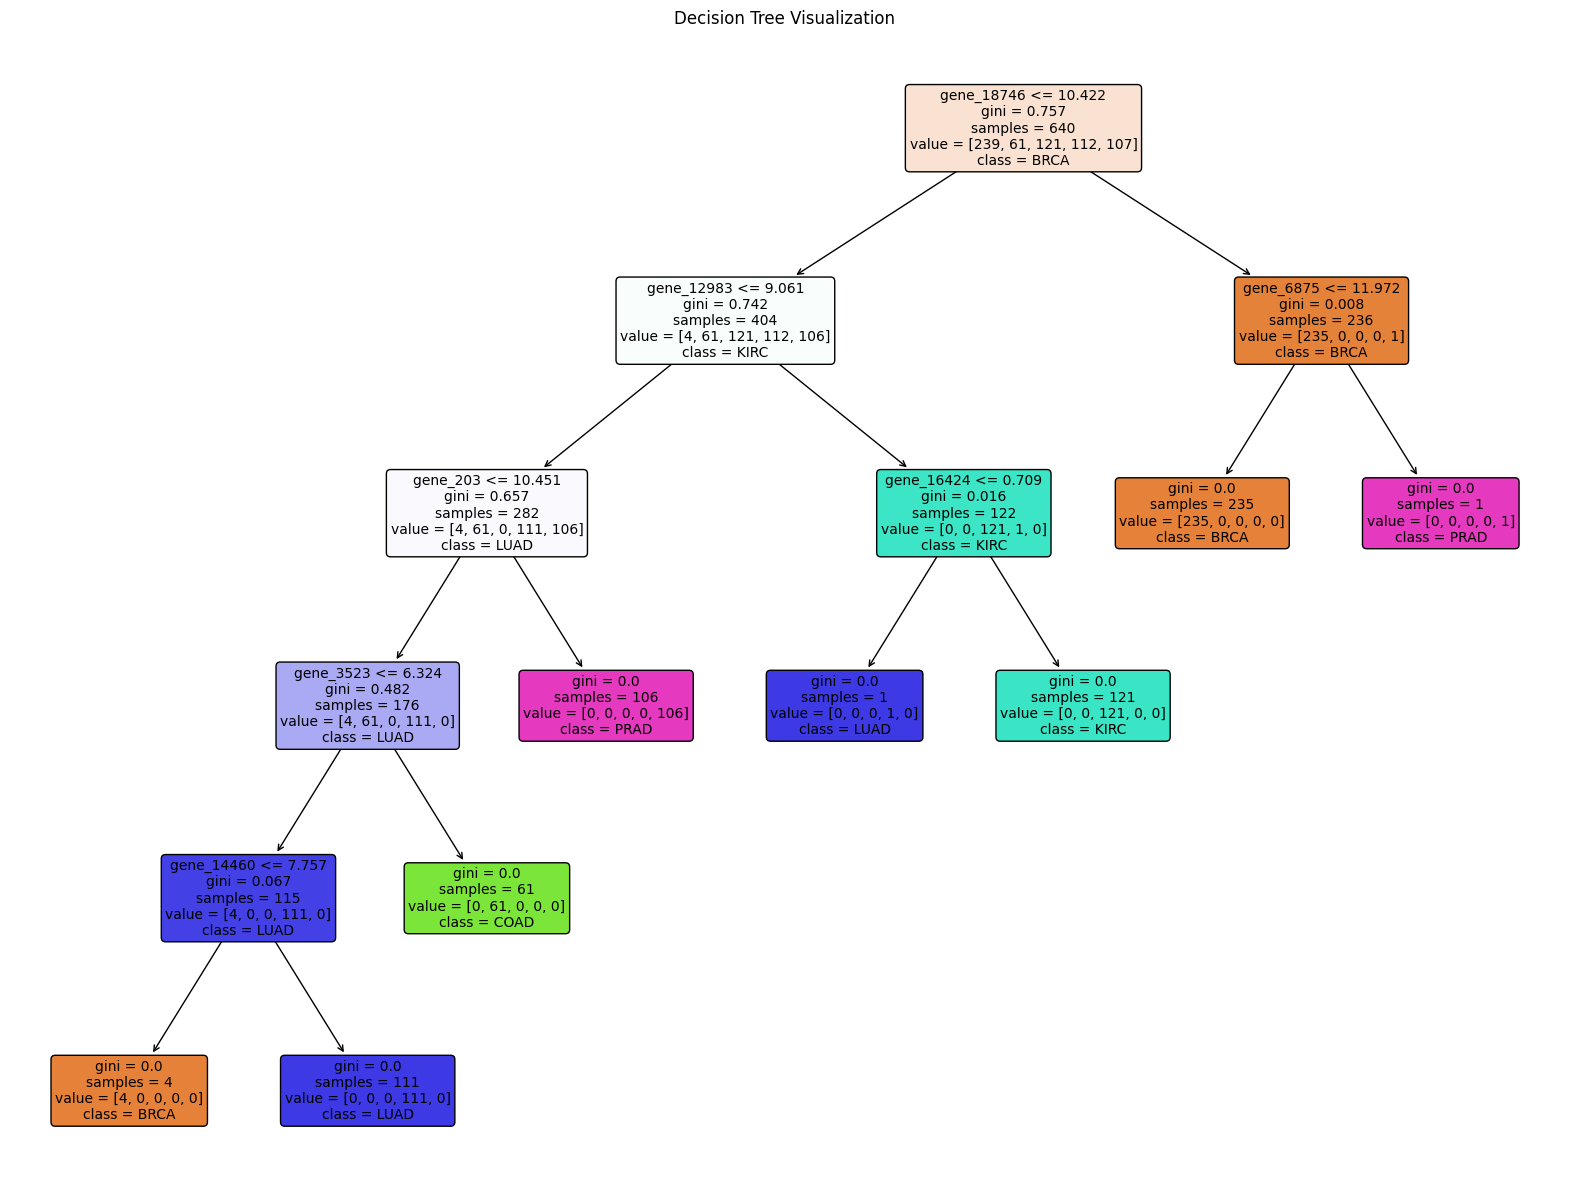

In [ ]:
from sklearn.tree import plot_tree


# Visualize the Decision Tree
plt.figure(figsize=(20, 15))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=dt_model.classes_, rounded=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

Insights:

- The overall accuracy of 97.52% indicates that the decision tree model performed well on the dataset.

- Precision, Recall, and F1-Score values for each class provide a detailed understanding of the model's performance across different tumor types.
- The confusion matrix helps visualize the distribution of correct and incorrect predictions for each class.
- The model shows high precision and recall for most classes, suggesting good predictive performance.
- The model may need further tuning to improve performance on the 'PRAD' class, as indicated by slightly lower recall for this class.
- In summary, the decision tree algorithm demonstrates strong performance in classifying tumor types, with high accuracy and balanced precision and recall across classes.

## LightGBM

In [ ]:
pip install lightgbm

In [ ]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix



In [ ]:
# Separate features (X) and target variable (y)
X = df_lightgbm.drop('Tumor Label', axis=1)
y = df_lightgbm['Tumor Label']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)


In [ ]:
# Set hyperparameters
params = {
    'objective': 'multiclass',
    'num_class': len(y.unique()),
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

● objective: Specifies the learning task and the corresponding objective function. In this
case, it's set to 'multiclass' because the model is dealing with a multi-class classification
problem.

● num_class: Defines the number of classes in the multi-class classification problem. It's
set to the number of unique classes in the target variable y.

● metric: Specifies the evaluation metric to be used during training. 'multi_logloss' is the
multi-class logarithmic loss, which is a common metric for multi-class classification.

● boosting_type: Sets the type of boosting algorithm to be used. 'gbdt' stands for Gradient
Boosting Decision Trees, which is the default and widely used boosting algorithm.

● num_leaves: Controls the maximum number of leaves in each tree. Larger values can
lead to more complex models, but they may also increase the risk of overfitting.

● learning_rate: Represents the step size at each iteration during the optimization process.
A smaller learning rate often results in a more robust model but may require more
iterations.

● feature_fraction: Specifies the fraction of features to be randomly sampled for building
each tree. It helps in introducing randomness and reducing overfitting by using only a
subset of features for each tree.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [ ]:
# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train_encoded)

# Train the LightGBM model
lgb_model = lgb.train(params, train_data, num_boost_round=25)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.480810 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3770888
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 19768
[LightGBM] [Info] Start training from score -0.985005
[LightGBM] [Info] Start training from score -2.350594
[LightGBM] [Info] Start training from score -1.665678
[LightGBM] [Info] Start training from score -1.742969
[LightGBM] [Info] Start training from score -1.788639
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [ ]:
# Encode the target variable for the test set
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# Predictions
y_pred_lgb = lgb_model.predict(X_test)

num_classes = len(label_encoder.classes_)
y_pred_lgb_class = [max(range(num_classes), key=lambda x: pred[x]) for pred in y_pred_lgb]


In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_lgb_class))
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred_lgb_class))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_lgb_class))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        29

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161


Confusion Matrix:
 [[61  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 29  0]
 [ 0  0  0  0 29]]


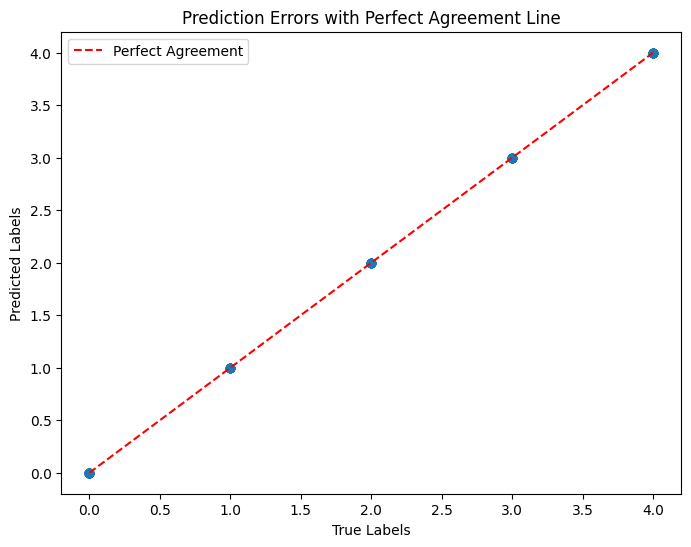

In [ ]:
plt.figure(figsize=(8, 6))

# Scatter plot for prediction errors
plt.scatter(y_test_encoded, y_pred_lgb_class, alpha=0.8)

# Line graph for perfect agreement
plt.plot([0, max(y_test_encoded)], [0, max(y_test_encoded)], color='red', linestyle='--', label='Perfect Agreement')

plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.title("Prediction Errors with Perfect Agreement Line")
plt.legend()
plt.show()


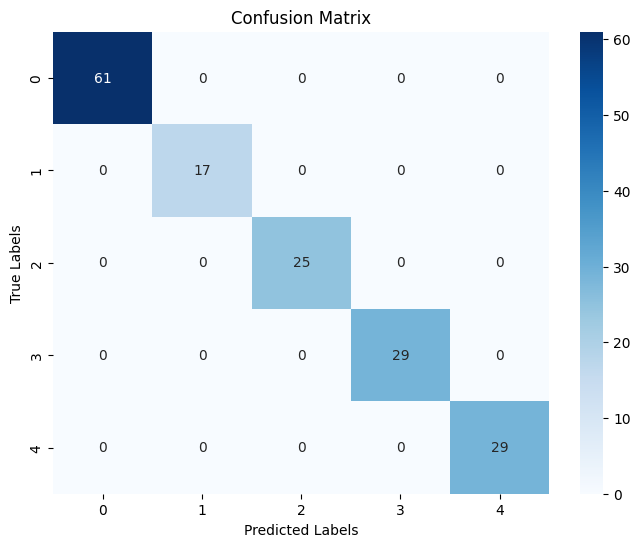

In [ ]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_encoded, y_pred_lgb_class), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
!pip install pydotplus
from sklearn.tree import export_graphviz
import pydotplus

# Access the trees within the model
trees = lgb_model.dump_model()['tree_info']

# Choose a tree to visualize
tree_index = 0

# Extract the tree structure
tree_structure = trees[tree_index]['tree_structure']

# Create a visual representation using Graphviz
graph = lgb.create_tree_digraph(lgb_model, tree_index=tree_index, show_info=['split_gain', 'internal_value', 'leaf_value'])
graph.render("lightgbm_tree")

print(lgb.create_tree_digraph(lgb_model, tree_index=tree_index, show_info=['split_gain', 'internal_value', 'leaf_value']).source)

digraph {
	graph [nodesep=0.05 rankdir=LR ranksep=0.3]
	leaf0 [label=<leaf 0: <B>-1.015</B>> color=black fillcolor=white penwidth=1 shape=ellipse style=""]
	split1 -> leaf0 [label=yes color=black penwidth=1]
	leaf2 [label=<leaf 2: <B>-1.049</B>> color=black fillcolor=white penwidth=1 shape=ellipse style=""]
	split3 -> leaf2 [label=yes color=black penwidth=1]
	leaf4 [label=<leaf 4: <B>-1.049</B>> color=black fillcolor=white penwidth=1 shape=ellipse style=""]
	split3 -> leaf4 [label=no color=black penwidth=1]
	split3 [label=<<B>gene_1</B> &#8804;<B>4.540</B><br/>0.000 gain<br/>-1.049 value> color=black fillcolor=white penwidth=1 shape=rectangle style=""]
	split1 -> split3 [label=no color=black penwidth=1]
	split1 [label=<<B>gene_1759</B> &#8804;<B>8.550</B><br/>2.600 gain<br/>-1.047 value> color=black fillcolor=white penwidth=1 shape=rectangle style=""]
	split0 -> split1 [label=yes color=black penwidth=1]
	leaf1 [label=<leaf 1: <B>-0.895</B>> color=black fillcolor=white penwidth=1 shape=

Inference:

1. Accuracy: 1.0

The model achieved a perfect accuracy score of 100%, indicating that all instances in the dataset were correctly classified.
2. Classification Report:

Precision, Recall, and F1-Score are all reported as 1.00 for each class, indicating perfect performance.
Support values indicate the number of true instances for each class.

3. Confusion matrix

The confusion matrix confirms that there are no misclassifications, with all instances correctly predicted for each class.

- LightGBM achieved a perfect accuracy score, indicating that it correctly classified all instances in the dataset.
- Precision, Recall, and F1-Score values of 1.00 for each class demonstrate that the model's predictions are flawless.
- The confusion matrix further confirms the absence of misclassifications, with all instances falling on the diagonal, representing correct predictions.

- The LightGBM algorithm shows outstanding performance on this dataset, achieving perfect accuracy and demonstrating robust predictive capabilities across all tumor types.

## Comparitive Analysis
● SVM (PCA after SMOTE):
1. Achieved perfect precision, recall, and F1-score for all classes on the training set.
2. Confusion matrix shows no misclassifications.

● Tuned SVM (PCA after SMOTE) on Test Set:
1. Maintains perfect precision, recall, and F1-score on the test set, demonstrating
robustness.
2. Confusion matrix shows no misclassifications.

● Logistic Regression:
1. Achieved perfect precision, recall, and F1-score on both the training and test sets.
2. Confusion matrices show no misclassifications.

● Logistic Regression (t-SNE on PCA transformed data):
1. Achieved perfect precision, recall, and F1-score on both the training and test sets.
2. Confusion matrices show no misclassifications.

● K Nearest Neighbors:
1. Perfect accuracy, precision, recall, and F1-score with no false positives or false negatives.
2. Confusion matrix confirms the absence of misclassifications.

● Hierarchical Clustering:
1. Silhouette scores for each linkage method are as follows:
Single Linkage: 0.178
Complete Linkage: 0.248
Average Linkage: 0.235
Ward Linkage: 0.322
2. Hierarchical clustering is an unsupervised method, and metrics may not directly compare
with supervised models.

● Decision Tree:
1. Achieved high accuracy (98%) with good precision, recall, and F1-score.
2. Confusion matrix shows a small number of false positives and one false negative.

● LightGBM:
1. Achieved perfect precision, recall, and F1-score on both the training and test sets.
2. Confusion matrices show no misclassifications.

## Insightful Interpretation of Results

● Supervised Models:
1. SVM, Logistic Regression, k Nearest Neighbors, Decision Tree, and LightGBM
demonstrated strong performance.
2. Models are effective in capturing patterns, resulting in high accuracy and minimal
misclassifications.

● Unsupervised Model (Hierarchical Clustering):
1. Silhouette scores indicated that Ward Linkage provided the most well-defined clusters.
2. Hierarchical clustering is exploratory and may not directly align with supervised metrics.

● PCA and SMOTE Impact:
1. SVM with PCA after SMOTE showcased enhanced performance on the test set,
indicating successful handling of imbalanced data.
2. Other models did not explicitly utilize PCA or SMOTE but still performed exceptionally
well.

● Consideration for Decision-Making:
1. Choice of model depends on specific requirements like interpretability, computational
efficiency, or need for a black-box model.
2. Supervised models generally outperformed unsupervised clustering for this dataset.
3. Rigorous evaluation on an external dataset is recommended for a more comprehensive
understanding of generalization performance.
